<a href="https://colab.research.google.com/github/bhargav23/CNN-Projects/blob/master/VGG/Fashion_Mnist_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
!git clone https://github.com/bhargav23/CNN-Projects

Cloning into 'CNN-Projects'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 149 (delta 77), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (149/149), 943.24 KiB | 2.07 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import sys
sys.path.append('/content/CNN-Projects/Libraries')

In [5]:
import evadataloader
dataloader = evadataloader.DataLoader()


# Train Phase transformations
train_transforms = transforms.Compose([
                                        transforms.Resize((28, 28)),
                                        #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                        transforms.Resize((28, 28)),
                                        #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])



trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=train_transforms)
trainloader = dataloader.load(trainset)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=test_transforms)
testloader = dataloader.load(testset)

classes = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...



Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


torch.Size([512, 1, 28, 28])
torch.Size([512])


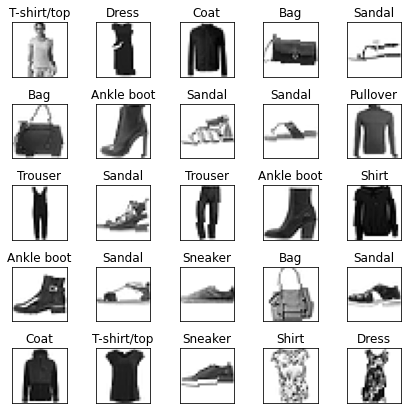

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
def show25(images, labels):
  r, c = 5, 5
  figmatrix = plt.figure(figsize=(7, 7))
  gs1 = gridspec.GridSpec(r, c)
  gs1.update(wspace=0.5, hspace=0.5) # set the 
  for i in range(1, r*c+1):
    plt.subplot(gs1[i-1])
    plt.tick_params( axis='both', which='both', labelbottom=False, labelleft=False, left=False, bottom=False)
    plt.imshow(images[i-1].numpy().squeeze(), cmap='gray_r')
    plt.title(classes[labels[i-1]])
  plt.show()

show25(images[:25], labels[:25])

In [7]:
import vggnet
net = vggnet.VGG('VGG19')

In [8]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
       BatchNorm2d-2           [-1, 64, 28, 28]             128
              ReLU-3           [-1, 64, 28, 28]               0
            Conv2d-4           [-1, 64, 28, 28]          36,928
       BatchNorm2d-5           [-1, 64, 28, 28]             128
              ReLU-6           [-1, 64, 28, 28]               0
         MaxPool2d-7           [-1, 64, 14, 14]               0
            Conv2d-8          [-1, 128, 14, 14]          73,856
       BatchNorm2d-9          [-1, 128, 14, 14]             256
             ReLU-10          [-1, 128, 14, 14]               0
           Conv2d-11          [-1, 128, 14, 14]         147,584
      BatchNorm2d-12          [-1, 128, 14, 14]             256
             ReLU-13          [-1, 128, 14, 14]               0
        MaxPool2d-14            [-

In [10]:
import evascheduler

In [11]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)

  0%|          | 0/118 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.3047594130039215 Batch_id=117 Accuracy=83.04: 100%|██████████| 118/118 [02:05<00:00,  1.06s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1262, Accuracy: 8738/10000 (87.38%)

EPOCH: 1


Loss=0.23080556094646454 Batch_id=117 Accuracy=90.43: 100%|██████████| 118/118 [02:06<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1057, Accuracy: 8943/10000 (89.43%)

EPOCH: 2


Loss=0.1376056671142578 Batch_id=117 Accuracy=91.75: 100%|██████████| 118/118 [02:06<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0877, Accuracy: 9123/10000 (91.23%)

EPOCH: 3


Loss=0.13475699722766876 Batch_id=117 Accuracy=93.04: 100%|██████████| 118/118 [02:05<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0903, Accuracy: 9097/10000 (90.97%)

EPOCH: 4


Loss=0.15218473970890045 Batch_id=117 Accuracy=93.61: 100%|██████████| 118/118 [02:07<00:00,  1.08s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0849, Accuracy: 9151/10000 (91.51%)

EPOCH: 5


Loss=0.13489747047424316 Batch_id=117 Accuracy=94.33: 100%|██████████| 118/118 [02:06<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0881, Accuracy: 9119/10000 (91.19%)

EPOCH: 6


Loss=0.18861956894397736 Batch_id=117 Accuracy=96.28: 100%|██████████| 118/118 [02:06<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0674, Accuracy: 9326/10000 (93.26%)

EPOCH: 7


Loss=0.11918029189109802 Batch_id=117 Accuracy=96.83: 100%|██████████| 118/118 [02:05<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0694, Accuracy: 9306/10000 (93.06%)

EPOCH: 8


Loss=0.07695796340703964 Batch_id=117 Accuracy=97.29: 100%|██████████| 118/118 [02:07<00:00,  1.08s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0669, Accuracy: 9331/10000 (93.31%)

EPOCH: 9


Loss=0.15019161999225616 Batch_id=117 Accuracy=97.56: 100%|██████████| 118/118 [02:06<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0664, Accuracy: 9336/10000 (93.36%)

EPOCH: 10


Loss=0.04569145664572716 Batch_id=117 Accuracy=97.66: 100%|██████████| 118/118 [02:06<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0665, Accuracy: 9335/10000 (93.35%)

EPOCH: 11


Loss=0.030396753922104836 Batch_id=117 Accuracy=97.98: 100%|██████████| 118/118 [02:05<00:00,  1.06s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0670, Accuracy: 9330/10000 (93.30%)

EPOCH: 12


Loss=0.07882745563983917 Batch_id=117 Accuracy=98.30: 100%|██████████| 118/118 [02:07<00:00,  1.08s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0648, Accuracy: 9352/10000 (93.52%)

EPOCH: 13


Loss=0.1478348821401596 Batch_id=117 Accuracy=98.36: 100%|██████████| 118/118 [02:06<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0650, Accuracy: 9350/10000 (93.50%)

EPOCH: 14


Loss=0.03428030386567116 Batch_id=117 Accuracy=98.37: 100%|██████████| 118/118 [02:06<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0655, Accuracy: 9345/10000 (93.45%)

EPOCH: 15


Loss=0.08696361631155014 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [02:05<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0658, Accuracy: 9342/10000 (93.42%)

EPOCH: 16


Loss=0.02732679806649685 Batch_id=117 Accuracy=98.46: 100%|██████████| 118/118 [02:07<00:00,  1.08s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0648, Accuracy: 9352/10000 (93.52%)

EPOCH: 17


Loss=0.02078554593026638 Batch_id=117 Accuracy=98.48: 100%|██████████| 118/118 [02:06<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0645, Accuracy: 9355/10000 (93.55%)

EPOCH: 18


Loss=0.0356346070766449 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [02:06<00:00,  1.07s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0650, Accuracy: 9350/10000 (93.50%)

EPOCH: 19


Loss=0.016367563977837563 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [02:05<00:00,  1.07s/it]



Test set: Average loss: 0.0647, Accuracy: 9353/10000 (93.53%)



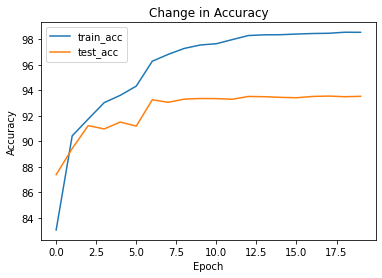

In [12]:
from evascheduler import draw_graph
draw_graph()

In [13]:
from evascheduler import get_misclassified
misclassified = get_misclassified()

In [14]:
def plot_images(img_data,classes,img_name):
  figure = plt.figure(figsize=(10, 10))
  
  num_of_images = len(img_data)
  for index in range(1, num_of_images + 1):
      img = img_data[index-1][0][0]
      plt.subplot(5, 5, index)
      plt.axis('off')
      plt.imshow(img.cpu().numpy(),cmap='gray_r')
      plt.title("Actual: %s\nPredicted: %s" % (classes[img_data[index-1][1]], classes[img_data[index-1][2]]))
  
  plt.tight_layout()
  plt.savefig(img_name)


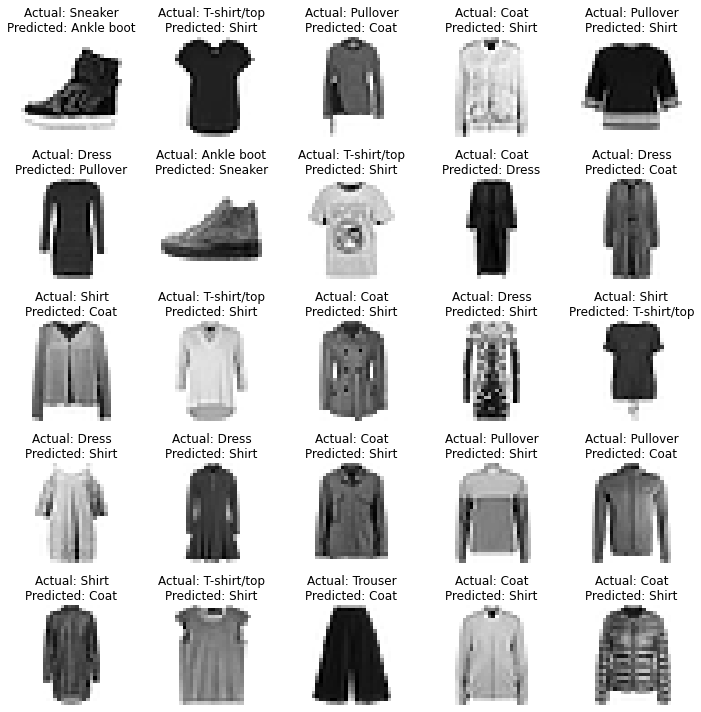

In [15]:
#import utils
#from utils import plot_images
plot_images(misclassified,classes,"misclassified.png")